In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import pickle
import sys

from ccf.SplitTimeSeries import naturalReindexDF
    
    
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20000)

# One factor

In [2]:
analyse = pd.read_csv('../analytics/block_vars_lgb_block_vars.csv')
analyse.loc[analyse.best_in_iter == 1]

,count,confidence_lower,confidence_upper,mean,std,min,25%,50%,75%,max,lower_boundary,upper_boundary,IQR,lower_whiskers,upper_whiskers,real_mean,real_std,lower_real,upper_real,macro,macro_mean,macro_std,macro_lower_bound,macro_upper_bound,curr_features,new_var,count_vars,best_in_iter
0,1000.0,47.650965,48.843810,48.261397,0.305484,47.094924,48.048013,48.269783,48.461115,49.353185,47.662649,48.860145,0.413101,47.428361,49.080767,48.261572,0.300632,47.672334,48.850811,[48.26988734796198],48.269887,1.0,46.309887,50.229887,['mul_user_content_ema_answ'],mul_user_content_ema_answ,1,1
1,1000.0,47.439702,48.658472,48.083711,0.316981,46.956554,47.873081,48.085356,48.305881,49.129100,47.462428,48.704993,0.432800,47.223881,48.955080,48.083979,0.314572,47.467417,48.700541,[48.0906193140417],48.090619,1.0,46.130619,50.050619,['mul_user_content_mean_answ'],mul_user_content_mean_answ,1,1
2,1000.0,47.266609,48.451908,47.847717,0.308935,46.768633,47.636011,47.842782,48.047298,48.933244,47.242204,48.453230,0.411288,47.019080,48.664230,47.847802,0.304672,47.250645,48.444959,[47.85444660107032],47.854447,1.0,45.894447,49.814447,['mul_user_content_he_ema_answ'],mul_user_content_he_ema_answ,1,1
3,1000.0,47.054221,48.334665,47.667606,0.322010,46.482997,47.462555,47.664954,47.880080,48.601764,47.036466,48.298747,0.417525,46.836267,48.506368,47.668125,0.318517,47.043832,48.292419,[47.67618852531792],47.676189,1.0,45.716189,49.636189,['mul_user_content_he_mean_answ'],mul_user_content_he_mean_answ,1,1
4,1000.0,43.525438,44.789895,44.178257,0.319298,43.095153,43.975149,44.176544,44.396457,45.061886,43.552433,44.804082,0.421308,43.343187,45.028419,44.178855,0.317091,43.557355,44.800354,[44.17267402575331],44.172674,1.0,42.212674,46.132674,['content_he_mean_answered_correctly'],content_he_mean_answered_correctly,1,1
5,1000.0,43.269739,44.476966,43.880905,0.314636,43.023028,43.666064,43.878167,44.102005,44.791400,43.264218,44.497592,0.435941,43.012151,44.755917,43.880870,0.314536,43.264379,44.497361,[43.87770139065496],43.877701,1.0,41.917701,45.837701,['content_mean_answered_correctly'],content_mean_answered_correctly,1,1
6,1000.0,41.374254,42.654669,41.997165,0.325519,41.066306,41.770988,41.986913,42.218864,42.974990,41.359148,42.635183,0.447876,41.099174,42.890679,41.996964,0.324761,41.360433,42.633496,[42.01378893434797],42.013789,1.0,40.053789,43.973789,['rel_content_part_mean_answ'],rel_content_part_mean_answ,1,1
7,1000.0,41.028465,42.258506,41.626370,0.326779,40.524584,41.394332,41.614943,41.846633,42.525769,40.985882,42.266857,0.452301,40.715879,42.525085,41.626757,0.325589,40.988603,42.264910,[41.64277518360571],41.642775,1.0,39.682775,43.602775,['rel_content_cl_mean_answ'],rel_content_cl_mean_answ,1,1
8,1000.0,39.182584,40.495125,39.826585,0.332651,38.845637,39.609091,39.816398,40.039535,40.953772,39.174590,40.478580,0.430444,38.963424,40.685201,39.825994,0.330233,39.178737,40.473250,[39.85327610958864],39.853276,1.0,37.893276,41.813276,['rel_content_he_part_mean_answ'],rel_content_he_part_mean_answ,1,1
9,1000.0,38.847755,40.165359,39.511223,0.336655,38.420397,39.288705,39.505405,39.736997,40.443088,38.851379,40.171067,0.448292,38.616266,40.409436,39.511541,0.335550,38.853862,40.169219,[39.50414052271762],39.504141,1.0,37.544141,41.464141,['rel_content_he_cl_mean_answ'],rel_content_he_cl_mean_answ,1,1


# Multi factor lgb

In [13]:
analyse = pd.read_csv('../analytics/block_vars_mf_multi_lgb_full_no_tail.csv')
analyse.loc[analyse.best_in_iter == 1]

,count,confidence_lower,confidence_upper,mean,std,min,25%,50%,75%,max,lower_boundary,upper_boundary,IQR,lower_whiskers,upper_whiskers,real_mean,real_std,lower_real,upper_real,macro,macro_mean,macro_std,macro_lower_bound,macro_upper_bound,curr_features,new_var,count_vars,best_in_iter
0,1000.0,52.168112,53.304829,52.740412,0.297485,51.899445,52.530916,52.744496,52.934308,53.651372,52.157342,53.323481,0.403392,51.925829,53.539395,52.740275,0.296913,52.158326,53.322225,[52.73801556718212],52.738016,1.0,50.778016,54.698016,"['content_he_mean_answered_correctly', 'user_e...",content_user_he_part_count_user_id,15,1
12,1000.0,52.137519,53.261023,52.696430,0.290733,51.795650,52.503344,52.687383,52.887026,53.524214,52.126593,53.266267,0.383682,51.927822,53.462548,52.696543,0.289615,52.128896,53.264189,[52.69423015038379],52.694230,1.0,50.734230,54.654230,"['content_he_mean_answered_correctly', 'user_e...",lect_user_part,14,1
40,1000.0,52.107274,53.204070,52.657030,0.296278,51.701445,52.459652,52.651192,52.862934,53.763078,52.076326,53.237734,0.403281,51.854731,53.467855,52.656613,0.292675,52.082970,53.230256,[52.650054128593624],52.650054,1.0,50.690054,54.610054,"['content_he_mean_answered_correctly', 'user_e...",lag_expl_and_part_bool,13,1
74,1000.0,52.069303,53.176348,52.623996,0.290004,51.625906,52.420299,52.629297,52.826271,53.551179,52.055589,53.192404,0.405972,51.811342,53.435229,52.624019,0.288765,52.058040,53.189998,[52.61734745344269],52.617347,1.0,50.657347,54.577347,"['content_he_mean_answered_correctly', 'user_e...",ema_chng_timestamp,12,1
103,1000.0,52.051844,53.203995,52.611874,0.306898,51.546910,52.394627,52.610940,52.823359,53.469408,52.010354,53.213394,0.428732,51.751528,53.466458,52.612218,0.305818,52.012815,53.211622,[52.6017038004027],52.601704,1.0,50.641704,54.561704,"['content_he_mean_answered_correctly', 'user_e...",content_user_he_count_user_id,11,1
210,1000.0,51.936864,53.071105,52.513581,0.298118,51.438881,52.306713,52.524305,52.713084,53.417267,51.929269,53.097892,0.406371,51.697156,53.322641,52.514053,0.295879,51.934130,53.093976,[52.52954114329707],52.529541,1.0,50.569541,54.489541,"['content_he_mean_answered_correctly', 'user_e...",prior_question_elapsed_time,10,1
250,1000.0,51.843510,53.003909,52.411305,0.297217,51.476039,52.210779,52.404759,52.608315,53.347694,51.828759,52.993851,0.397536,51.614474,53.204619,52.411336,0.295461,51.832233,52.990440,[52.408850198259096],52.408850,1.0,50.448850,54.368850,"['content_he_mean_answered_correctly', 'user_e...",rel_user_he_mean_answ,9,1
284,1000.0,51.737417,52.839041,52.272787,0.280291,51.440791,52.086093,52.263680,52.461851,53.119606,51.723416,52.822158,0.375759,51.522455,53.025489,52.272738,0.279418,51.725078,52.820397,[52.26743437436927],52.267434,1.0,50.307434,54.227434,"['content_he_mean_answered_correctly', 'user_e...",trend_user_he_mean_answ,8,1
337,1000.0,51.656635,52.796464,52.230996,0.300722,51.311377,52.025366,52.239865,52.424839,53.190077,51.641582,52.820411,0.399473,51.426157,53.024048,52.230845,0.299633,51.643564,52.818126,[52.22839227201375],52.228392,1.0,50.268392,54.188392,"['content_he_mean_answered_correctly', 'user_e...",lag_answ_and_part_bool,7,1
383,1000.0,51.495611,52.663604,52.058676,0.300077,51.018718,51.851183,52.061931,52.259173,53.150199,51.470525,52.646828,0.407991,51.239197,52.871159,52.058167,0.297134,51.475785,52.640550,[52.044594767081456],52.044595,1.0,50.084595,54.004595,"['content_he_mean_answered_correctly', 'user_e...",user_sum_answered_correctly,6,1


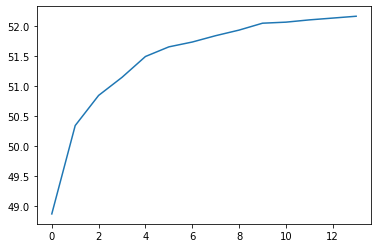

In [14]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(14)], list(analyse.loc[analyse.best_in_iter == 1]['confidence_lower'])[::-1])

# Fine tuning

In [2]:
analyse = pd.read_csv('../data/full_dataset/analytics/block_vars_lgb_fine_tuning_31.csv')
analyse.loc[analyse.best_in_iter == 1]

,count,confidence_lower,confidence_upper,mean,std,min,25%,50%,75%,max,lower_boundary,upper_boundary,IQR,lower_whiskers,upper_whiskers,real_mean,real_std,lower_real,upper_real,macro,macro_mean,macro_std,macro_lower_bound,macro_upper_bound,curr_features,new_var,count_vars,best_in_iter
0,1000.0,52.744477,53.952518,53.355627,0.316932,52.360997,53.143193,53.346245,53.580954,54.431998,52.73444,53.976814,0.437762,52.486551,54.237597,53.35556,0.314352,52.739429,53.971691,[53.355129216195074],53.355129,1.0,51.395129,55.315129,"['content_he_mean_answered_correctly', 'user_e...",content_user_he_part_count_user_id,15,1


In [3]:
analyse = pd.read_csv('../data/full_dataset/analytics/block_vars_lgb_fine_tuning_127.csv')
analyse.loc[analyse.best_in_iter == 1]

,count,confidence_lower,confidence_upper,mean,std,min,25%,50%,75%,max,lower_boundary,upper_boundary,IQR,lower_whiskers,upper_whiskers,real_mean,real_std,lower_real,upper_real,macro,macro_mean,macro_std,macro_lower_bound,macro_upper_bound,curr_features,new_var,count_vars,best_in_iter
0,1000.0,53.059021,54.257377,53.671105,0.300032,52.538929,53.465476,53.682944,53.868886,54.571988,53.083042,54.259167,0.40341,52.860361,54.474001,53.671336,0.298514,53.086248,54.256424,[53.671288541877814],53.671289,1.0,51.711289,55.631289,"['content_he_mean_answered_correctly', 'user_e...",content_user_he_part_count_user_id,15,1
